In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from helpers import MultiDim_SPCI_class as MultiDim_CP
from helpers import plotter

In [6]:
print(f'######### Wind 2d data #########')
alpha = 0.05
tr_frac = 0.85 # Fraction of data to use for training
data_dict = np.load('data.npz')
Xfull, Yfull = data_dict['Xfull'], data_dict['Yfull']
ntr = int(tr_frac * len(Xfull))
Xtr, Xte, Ytr, Yte = Xfull[:ntr], Xfull[ntr:], Yfull[:ntr], Yfull[ntr:]
s=1
smallT = False
past_window = 10
bins = 5
B = 15 
fit_func = LinearRegression()
CP_obj = MultiDim_CP.SPCI_and_EnbPI(Xtr, Xte, Ytr, Yte, fit_func)
CP_obj.bins = bins
CP_obj.fit_bootstrap_models_online_multistep(B=B,stride=s)
CP_obj.compute_Widths_Ensemble_online(alpha=alpha, stride=s, smallT=smallT, 
                                        past_window=past_window, use_SPCI=True)
mean_cov, mean_size = CP_obj.get_results()
coverages_all, width_all = CP_obj.coverages_all, CP_obj.width_all
print(f'################################################')
print(f'Average coverage: {mean_cov:.2f}')
print(f'Average size: {mean_size:.2e}')

######### Wind 2d data #########
1/1 multi-step: finish Fitting 15 Bootstrap models, took 0.049386024475097656 secs.
Leave-one-out residuals computed, took 0.03053760528564453 secs.
Shape of slided e_t lists is (115, 649)
Radius of Ellipsoid at test 0 is 3.045497063547373
Radius of Ellipsoid at test 5 is 3.953873850405216
Radius of Ellipsoid at test 10 is 2.2132653035223484
Radius of Ellipsoid at test 15 is 2.0669642724096775
Radius of Ellipsoid at test 20 is 1.9398394860327244
Radius of Ellipsoid at test 25 is 2.3046964444220066
Radius of Ellipsoid at test 30 is 2.034189824014902
Radius of Ellipsoid at test 35 is 1.9893106259405613
Radius of Ellipsoid at test 40 is 3.9550551772117615
Radius of Ellipsoid at test 45 is 2.118711594492197
Radius of Ellipsoid at test 50 is 1.9254746474325657
Radius of Ellipsoid at test 55 is 2.225926522165537
Radius of Ellipsoid at test 60 is 2.086172226816416
Radius of Ellipsoid at test 65 is 2.2461472786962986
Radius of Ellipsoid at test 70 is 2.02781951

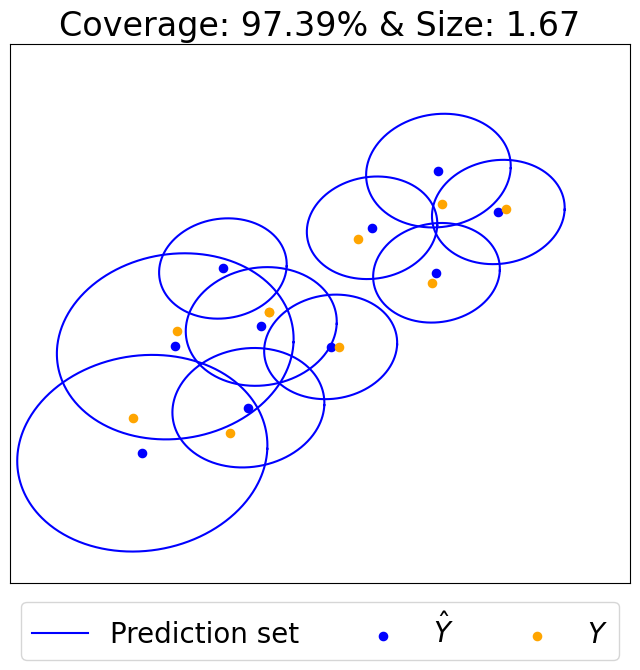

In [7]:
# Plot predicted on top of true
Yte = Yte; Yhat = CP_obj.Ensemble_pred_interval_centers
cov_mat_est_inv = CP_obj.global_cov_inv
radius = [a-b for a, b in zip(CP_obj.Width_Ensemble.iloc[:, 1], CP_obj.Width_Ensemble.iloc[:, 0])]
idx = plotter.find_furthest_point_idxes(Yhat, n1=10)
x, y = [], []
for i in range(len(Yte)):
    x_i, y_i = plotter.return_ellipsoid(cov_mat_est_inv, radius[i])
    x.append(x_i); y.append(y_i)
x = np.array(x); y = np.array(y)
xlim = [-2.3, 3.8]; ylim = [-1.9, 3.4]
fig = plotter.plot_uncertainty_set(Yte, Yhat, [x, y], idx, 100*mean_cov, mean_size, xlim = xlim, ylim = ylim, box = False)